In [2]:
!pip install -q dataprep pycaret
# https://pycaret.readthedocs.io/en/latest/index.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 46.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from dataprep.eda import plot
from pycaret.classification import setup, compare_models, plot_model, save_model, load_model, predict_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data
df = pd.read_csv("https://github.com/kairess/toy-datasets/raw/master/aw_fb_data.csv")
df.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [5]:
df = df.drop(['Unnamed: 0', 'X1'], axis=1)

df.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   6264 non-null   int64  
 1   gender                6264 non-null   int64  
 2   height                6264 non-null   float64
 3   weight                6264 non-null   float64
 4   steps                 6264 non-null   float64
 5   hear_rate             6264 non-null   float64
 6   calories              6264 non-null   float64
 7   distance              6264 non-null   float64
 8   entropy_heart         6264 non-null   float64
 9   entropy_setps         6264 non-null   float64
 10  resting_heart         6264 non-null   float64
 11  corr_heart_steps      6264 non-null   float64
 12  norm_heart            6264 non-null   float64
 13  intensity_karvonen    6264 non-null   float64
 14  sd_norm_heart         6264 non-null   float64
 15  steps_times_distance 

In [7]:
# chatgpt 물어보기 : https://chat.openai.com/share/cb1db5e8-3762-4ca9-b8ed-435fb1420530

In [8]:
# 데이터 추출
df = df[df['device']=='apple watch']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 3655
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   3656 non-null   int64  
 1   gender                3656 non-null   int64  
 2   height                3656 non-null   float64
 3   weight                3656 non-null   float64
 4   steps                 3656 non-null   float64
 5   hear_rate             3656 non-null   float64
 6   calories              3656 non-null   float64
 7   distance              3656 non-null   float64
 8   entropy_heart         3656 non-null   float64
 9   entropy_setps         3656 non-null   float64
 10  resting_heart         3656 non-null   float64
 11  corr_heart_steps      3656 non-null   float64
 12  norm_heart            3656 non-null   float64
 13  intensity_karvonen    3656 non-null   float64
 14  sd_norm_heart         3656 non-null   float64
 15  steps_times_distance 

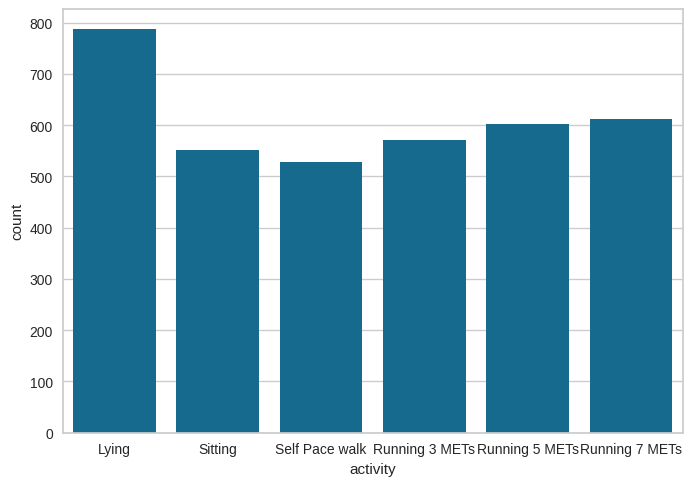

In [9]:
# 데이터셋 시각화
sns.countplot(x=df["activity"])
plt.show()

In [10]:
plot(df)

Output hidden; open in https://colab.research.google.com to view.

In [11]:
s = setup(
    data=df,
    target="activity",
    train_size=0.8,
    preprocess=True,
    remove_outliers=True,
    fold_strategy="stratifiedkfold",
    fold=10,
    session_id=2024,
)

,Description,Value
0,Session id,2023
1,Target,activity
2,Target type,Multiclass
3,Target mapping,"Lying: 0, Running 3 METs: 1, Running 5 METs: 2, Running 7 METs: 3, Self Pace walk: 4, Sitting: 5"
4,Original data shape,"(3656, 18)"
5,Transformed data shape,"(3509, 18)"
6,Transformed train set shape,"(2777, 18)"
7,Transformed test set shape,"(732, 18)"
8,Numeric features,16
9,Categorical features,1


Kappa : 다중 평가자 간의 일치도를 측정,  주로 분류 작업에서 사용되며, 평가자들이 특정 항목에 대해 동일한 판단을 내리는 정도를 측정. Kappa 통계량은 일반적으로 -1에서 1 사이의 값. 1에 가까울수록 평가자들 간의 높은 일치를 나타내며, 0 또는 음수에 가까울수록 무작위 수준 이하의 일치를 나타냄.

MCC(Matthews Correlation Coefficient) : 이진 분류 작업의 성능을 측정하는데 사용되는 통계적 지표

In [12]:
# 모델 비교
# https://ai-com.tistory.com/entry/ML-%EB%B6%84%EB%A5%98-%EC%84%B1%EB%8A%A5-%EC%A7%80%ED%91%9C-Precision%EC%A0%95%EB%B0%80%EB%8F%84-Recall%EC%9E%AC%ED%98%84%EC%9C%A8
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8239,0.0000,0.8239,0.8262,0.8237,0.7878,0.7883,0.7380
lightgbm,Light Gradient Boosting Machine,0.8215,0.0000,0.8215,0.8265,0.8218,0.7850,0.7857,7.3720
rf,Random Forest Classifier,0.8188,0.0000,0.8188,0.8228,0.8191,0.7815,0.7821,1.0550
xgboost,Extreme Gradient Boosting,0.8174,0.0000,0.8174,0.8209,0.8175,0.7800,0.7806,1.2450
dt,Decision Tree Classifier,0.7015,0.0000,0.7015,0.7056,0.7015,0.6404,0.6411,0.3970
gbc,Gradient Boosting Classifier,0.7015,0.0000,0.7015,0.7045,0.7007,0.6402,0.6411,5.8850
knn,K Neighbors Classifier,0.5835,0.0000,0.5835,0.5822,0.5788,0.4971,0.4986,0.2680
ada,Ada Boost Classifier,0.4350,0.0000,0.4350,0.4324,0.4306,0.3199,0.3208,0.6270
lda,Linear Discriminant Analysis,0.3536,0.0000,0.3536,0.3498,0.3453,0.2175,0.2195,0.2500
nb,Naive Bayes,0.3441,0.0000,0.3441,0.3623,0.3351,0.2130,0.2195,0.2450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

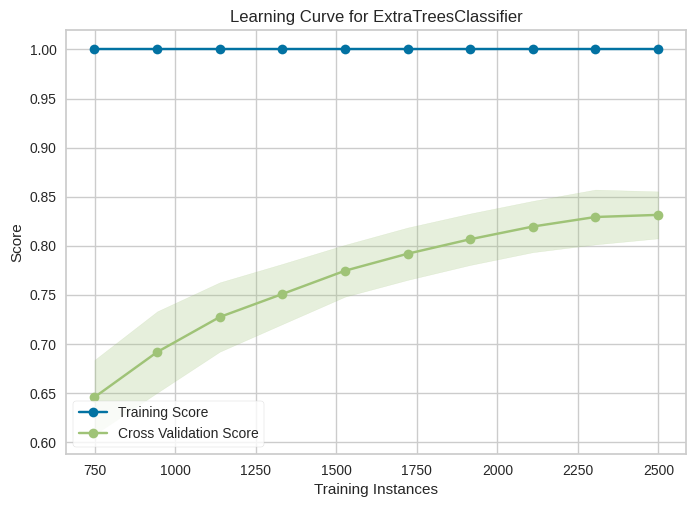

In [13]:
# 모델 평가
plot_model(best, plot="learning")

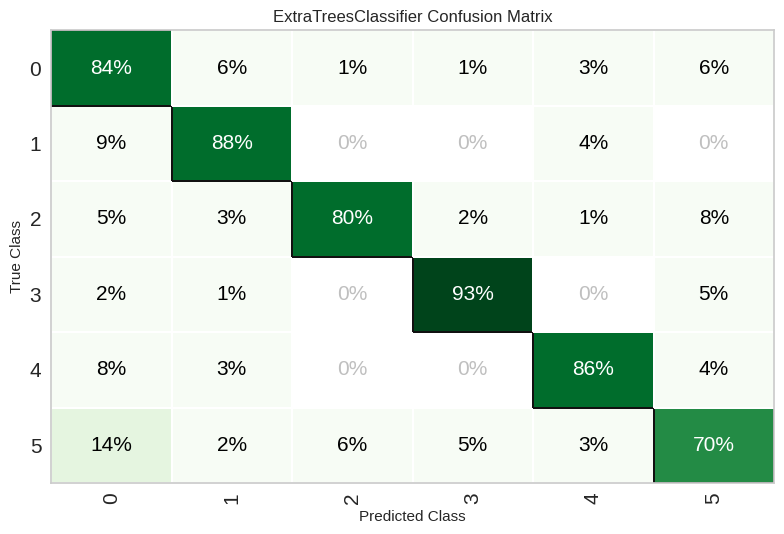

In [14]:
plot_model(best, plot="confusion_matrix", plot_kwargs={"percent": True})

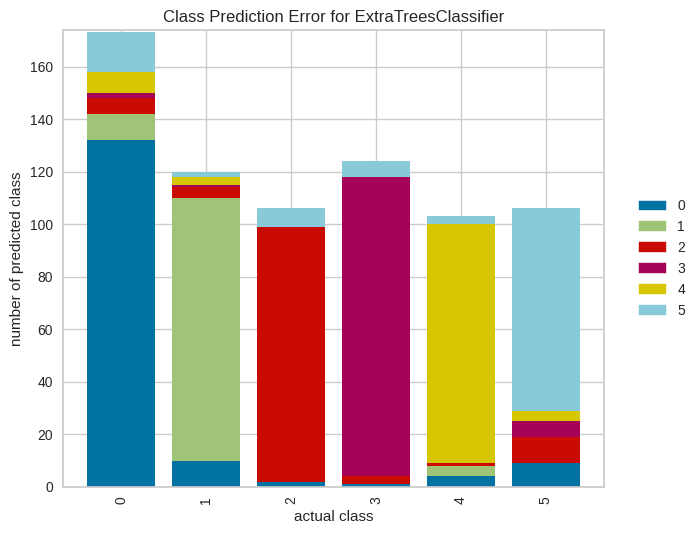

In [15]:
plot_model(best, plot="error")

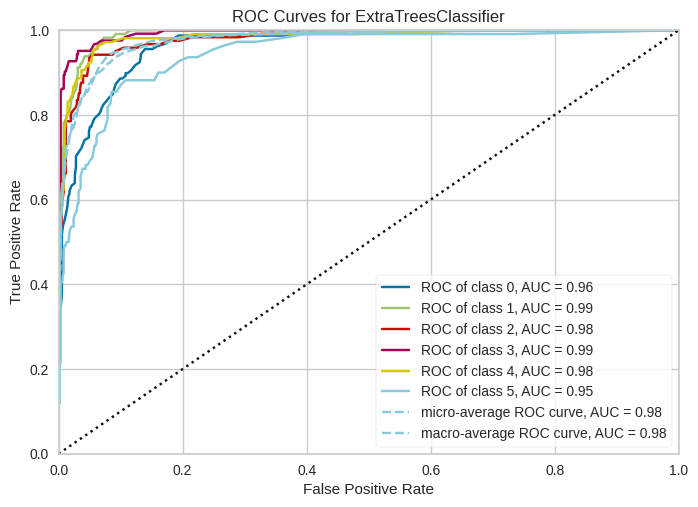

In [16]:
plot_model(best, plot="auc")

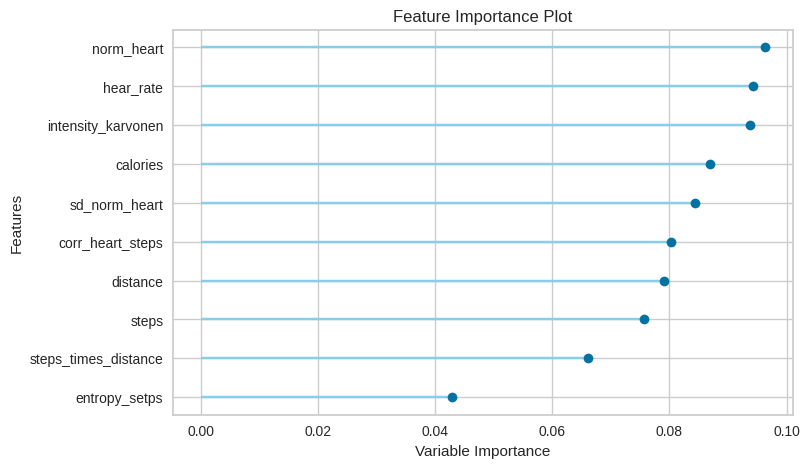

In [17]:
plot_model(best, plot="feature")

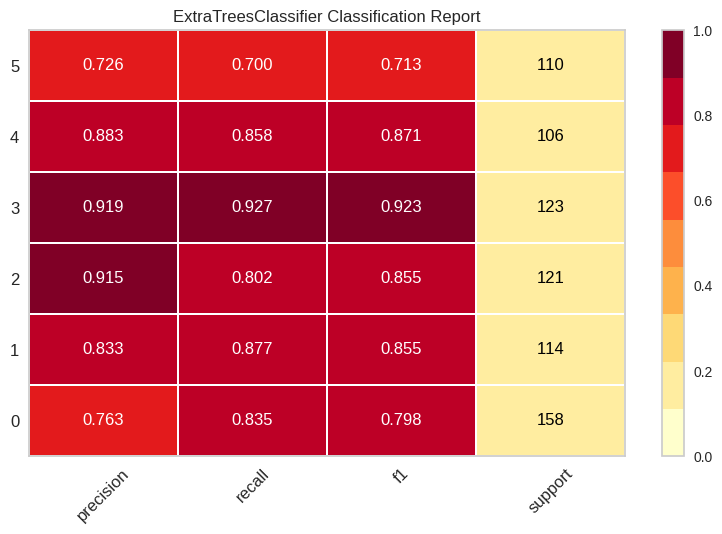

In [18]:
plot_model(best, plot="class_report")

In [19]:
# 모델 저장
save_model(best, 'best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'gender', 'height',
                                              'weight', 'steps', 'hear_rate',
                                              'calories', 'distance',
                                              'entropy_heart', 'entropy_setps',
                                              'resting_heart',
                                              'corr_heart_steps...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                          

In [20]:
# 베스트 모델 로드
loaded_model = load_model('best')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'gender', 'height',
                                             'weight', 'steps', 'hear_rate',
                                             'calories', 'distance',
                                             'entropy_heart', 'entropy_setps',
                                             'resting_heart',
                                             'corr_...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=2023, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [24]:
print(len(df))

3656


In [25]:
# 테스트
pred = predict_model(loaded_model, data=df[0:1000])

pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9690,0.9993,0.9690,0.9691,0.9690,0.9626,0.9626


,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,prediction_label,prediction_score
0,20,1,168.0,65.400002,10.771428,78.531303,0.344533,0.008327,6.221611,6.116349,59.0,1.000000,19.531301,0.138520,1.000000,0.089692,apple watch,Lying,Lying,0.87
1,20,1,168.0,65.400002,11.475325,78.453392,3.287626,0.008896,6.221611,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,Lying,1.00
2,20,1,168.0,65.400002,12.179221,78.540825,9.484000,0.009466,6.221611,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115286,apple watch,Lying,Lying,1.00
3,20,1,168.0,65.400002,12.883117,78.628258,10.154555,0.010035,6.221611,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,Lying,1.00
4,20,1,168.0,65.400002,13.587013,78.715698,10.825111,0.010605,6.221611,6.116349,59.0,0.982816,19.715694,0.139828,0.241567,0.144088,apple watch,Lying,Lying,1.00
